In [1]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

rules: 25
reactions: 40
species: 37
parameters: 54
rate constants: 40

ComponentSet([
 Parameter('TNF_0', 2326.0),
 Parameter('TNFR_0', 4800.0),
 Parameter('TRADD_0', 4696.0),
 Parameter('RIP1_0', 40000.0),
 Parameter('TRAF_0', 11776.0),
 Parameter('cIAP_0', 9000.0),
 Parameter('A20_0', 9000.0),
 Parameter('CYLD_0', 9000.0),
 Parameter('FADD_0', 3109.0),
 Parameter('flip_L_0', 3900.0),
 Parameter('Lubac_0', 7226.0),
 Parameter('C8_0', 3799.0),
 Parameter('RIP3_0', 10654.0),
 Parameter('MLKLa_0', 5544.0),
 Parameter('p1f', 1e-06),
 Parameter('p1r', 0.001),
 Parameter('p2f', 0.001),
 Parameter('p3f', 1e-06),
 Parameter('p3r', 0.001),
 Parameter('p4f', 1e-06),
 Parameter('p4r', 0.001),
 Parameter('p5f', 1e-06),
 Parameter('p5r', 0.001),
 Parameter('p6f', 1e-06),
 Parameter('p6r', 0.001),
 Parameter('p7f', 0.1),
 Parameter('p8f', 1e-06),
 Parameter('p8r', 0.001),
 Parameter('p9f', 1e-06),
 Parameter('p9r', 0.001),
 Parameter('p10f', 0.1),
 Parameter('p11f', 1e-06),
 Parameter('p11r', 0.001

In [ ]:
print(len(model.species))
print(len(model.parameters_rules()))
print(len(model.reactions))

In [45]:
mode1_100[0,14:]

array([1.97196861e-07, 5.93424172e-04, 9.92078139e-05, 5.55291587e-07,
       1.42416162e-01, 5.00784672e+03, 1.76585766e-03, 3.97906353e+00,
       3.72676067e-06, 4.15493587e+00, 7.43151158e-03, 2.55181451e-03,
       1.63679889e-03, 6.79286289e-09, 4.62644290e+02, 3.86356627e-06,
       2.18682817e+01, 4.62644290e+02, 3.89726331e-02, 1.13651777e-04,
       2.81208603e+06, 3.52896159e-02, 3.85863441e-02, 9.19786699e-01,
       4.05202911e-04, 3.59014771e-07, 3.92308993e-04, 4.91447197e-01,
       4.35180593e+01, 9.54944079e-04, 2.39209291e-01, 5.28318555e-03,
       3.50692934e+01, 1.14472403e-01, 1.54165300e-02, 1.14162116e-04,
       5.93716929e-04, 2.16973042e+00, 9.34925296e+01, 1.41543684e+02])

In [30]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
mode4_100e = np.load('../../param_files/most_likely_par_10k_necropydream_may72020_667extra.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster4_5720_mod.npy')
mode4_100all = np.load('../../param_files/necro_pars10k_cluster4_5720_modw667.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [21]:
n_pars = len(mode4_100e)
all_pars = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = mode4_100e[i]
    param_values[rate_mask] = 10**par
    all_pars[i] = param_values

In [22]:
all_pars[0]

array([2.32600000e+03, 4.80000000e+03, 4.69600000e+03, 4.00000000e+04,
       1.17760000e+04, 9.00000000e+03, 9.00000000e+03, 9.00000000e+03,
       3.10900000e+03, 3.90000000e+03, 7.22600000e+03, 3.79900000e+03,
       1.06540000e+04, 5.54400000e+03, 5.66606378e-09, 3.40374951e-03,
       4.60979612e-05, 3.43295167e-04, 5.96567606e+00, 2.20483461e-02,
       7.77398689e-03, 4.35165862e+00, 1.46064998e-05, 7.85861718e-01,
       4.14709694e-02, 2.32147989e-04, 1.34928579e-01, 1.70504796e-06,
       6.11613348e-06, 2.46855874e-03, 2.23816780e-03, 8.17499769e+01,
       9.13326228e-06, 3.44003385e+00, 2.92945657e+04, 1.44474273e-02,
       9.90209656e-04, 2.06674492e-06, 2.11980426e-04, 2.30462534e-02,
       1.25966449e-01, 1.26283720e+00, 5.15339706e-04, 1.56307021e+00,
       7.23501201e-03, 4.18832378e-04, 7.60841216e+00, 2.72823278e-02,
       2.77773557e-03, 8.94332035e-02, 4.20019908e-05, 2.40989376e+00,
       2.60142176e-02, 5.24751441e+03])

In [28]:
mode4_100new = np.concatenate([mode4_100,all_pars])
print(len(mode4_100new))
np.save('../../param_files/necro_pars10k_cluster4_5720_modw667.npy', mode4_100new)

3489


In [2]:
mode4_100e = np.load('../../param_files/necro_pars10k_cluster41_5720_modsplit.npy')
mode4_100m = np.load('../../param_files/necro_pars10k_cluster42_5720_modsplit.npy')
mode4_100d = np.load('../../param_files/necro_pars10k_cluster43_5720_modsplit.npy')

In [3]:
tspan = np.linspace(0, 1440, 1441)

In [ ]:
solverwtm4 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4 = solverwtm4.run(param_values=mode4_100, num_processors = 20)
m4df100wt = wtm4.dataframe

In [ ]:
m4df100wt['MLKLa_obs'].iloc[:].max()

In [ ]:
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#10TNF
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#1TNF
plt.errorbar(x1/60, y1*5544,
             yerr=[(0,0.085233734*5544,0.006063293*5544,0.009426917*5544,0.011334223*5544,
                    0.02*5544),(400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

plt.errorbar(x2/60, y2*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
#01 TNF
plt.errorbar(x01/60, y01*5544,
              yerr=[(0, 0.006714721*5544,0.007776423*5544,0.00919829*5544,0.001772636*5544,
                    0.005*5544, 0.013633013*5544), (400,400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100)):
    plt.plot(tspan/60, m4df100wt.loc[n]['MLKLa_obs'].iloc[:]/m4df100wt['MLKLa_obs'].iloc[:].max(),
             label = 'pMLKL', zorder =1, lw=2)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0, ymax = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
df = pd.concat([m4df100wt],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

lower_quantile = 0.01  # 10%
upper_quantile = 0.98  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=.5)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.set_xticks([0, 5, 10, 15, 20, 24])    
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)    
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [ ]:
df = pd.concat([m4df100wt],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

lower_quantile = 0.0  # 10%
upper_quantile = 1.0  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=.5)
ax.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.07,.07,.07,.07)],
                   fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.errorbar(x1002/60, y1002,
             yerr= .07, fmt='.k', ecolor ='black', alpha = 1, zorder = 2)
ax.set_xticks([0, 5, 10, 15, 20, 24])    
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)    
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmax =24)
plt.ylim(ymin = 1e-3, ymax = 1)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [4]:
solverwtm4e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4e = solverwtm4e.run(param_values=mode4_100e, num_processors = 20)
m4edf100wt = wtm4e.dataframe

2021-12-22 19:20:55.243 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-22 19:20:55.956 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-22 19:20:56.075 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-22 19:20:56.127 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-22 19:20:58.883 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-22 19:20:58.885 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-22 19:20:59.104 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
solverwtm4e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4e = solverwtm4e.run(param_values=mode4_100e, num_processors = 20)
m4ealldf100wt = wtm4e.dataframe

In [ ]:
for i,p in enumerate(np.linspace(0, 1440, 1441)):
    print(i,":",p)

In [ ]:
sim_idx_mode4e = [idx for idx in range(len(mode4_100e)) if m4ealldf100wt['MLKLa_obs'][idx].iloc[300] <= 2772]
print(sim_idx_mode4e)

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100e)):
    plt.plot(tspan/60, m4ealldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m4ealldf100wt['MLKLa_obs'].iloc[:].max(),
             label = 'pMLKL', zorder =1, lw=2)
plt.plot(tspan/60, m4edf100wt['MLKLa_obs'].iloc[:]/m4edf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0, ymax = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
m = model.monomers
# rip1 = wtm4e.observable(m.RIP1())
# rip1ub = wtm4e.observable(m.RIP1(state='K63ub'))
# rip1db = wtm4e.observable(m.RIP1(state='deub'))
# rip1all= rip1un+rip1ub+rip1db

In [ ]:
rip1 = wtm4e.observable(m.RIP1())

In [ ]:
rip1

In [ ]:
m4edf100wt['RIP1unphos_obs']

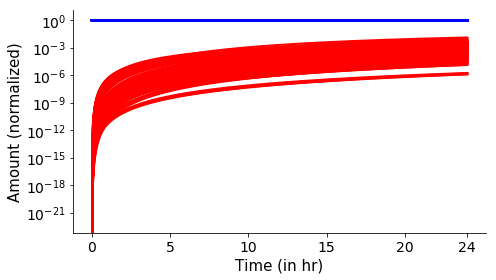

In [8]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode4_100e)):
    plt.plot(tspan/60, m4edf100wt.loc[n]['RIP1unphos_obs'].iloc[:]/m4edf100wt.loc[n]['RIP1_obs'].iloc[:],label = 'RIP1_unphos', color = 'blue',zorder =1, lw=2)
    plt.plot(tspan/60, m4edf100wt.loc[n]['RIP1phos_obs'].iloc[:]/m4edf100wt.loc[n]['RIP1_obs'].iloc[:],label = 'RIP1_phos', color = 'red',zorder =1, lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
# plt.ylim(ymin = 0.8)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4edf100wt['CI_k63_obs'].iloc[:]/m4edf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4edf100wt['CII_C8a_obs'].iloc[:]/m4edf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4edf100wt['CII_RIP3_obs'].iloc[:]/m4edf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4edf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4edf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4edf100wt['MLKLa_obs'].iloc[:]/m4edf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
solverm4m = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4m = solverm4m.run(param_values=mode4_100m[7], num_processors = 20)
m4mdf100wt = wtm4m.dataframe

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4mdf100wt['CI_k63_obs'].iloc[:]/m4mdf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4mdf100wt['CII_C8a_obs'].iloc[:]/m4mdf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4mdf100wt['CII_RIP3_obs'].iloc[:]/m4mdf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4mdf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4mdf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4mdf100wt['MLKLa_obs'].iloc[:]/m4mdf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', linestyle = '--',color = 'black',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4m_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [ ]:
solverm4d = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm4d = solverm4d.run(param_values=mode4_100d[3], num_processors = 20)
m4ddf100wt = wtm4d.dataframe

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m4ddf100wt['CI_k63_obs'].iloc[:]/m4ddf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m4ddf100wt['CII_C8a_obs'].iloc[:]/m4ddf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m4ddf100wt['CII_RIP3_obs'].iloc[:]/m4ddf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m4ddf100wt['RIP1RIP3unmod_obs'].iloc[:]/m4ddf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m4ddf100wt['MLKLa_obs'].iloc[:]/m4ddf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black',linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode4d_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [36]:
m = model.components
tspan = np.linspace(0,1800,500)
threshold = 2772

In [32]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(param_values=mode4_100all, num_processors = 20)
m1alldf100wt = wtm1.dataframe

2022-01-02 21:56:56.591 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:56:56.598 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:56:56.649 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:56:56.881 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 22:01:14.626 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 22:01:14.630 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 22:01:17.027 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [33]:
solvera201 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=mode4_100all, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c1df100a201 = a20clus1.dataframe

2022-01-02 22:01:20.296 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 22:01:20.302 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 22:01:20.336 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 22:01:20.525 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 22:05:07.500 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 22:05:07.502 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 22:05:09.972 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [34]:
solvercyld0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=mode4_100all, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cyld = cyldclus0.dataframe

2022-01-02 22:05:13.207 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 22:05:13.212 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 22:05:13.246 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 22:05:13.436 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 22:09:03.302 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 22:09:03.304 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 22:09:05.822 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [37]:
df_threshtimesc2100wt = m1alldf100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c1df100a201.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c0df100cyld .groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [38]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLDKO','A20KO'])
dfclus0n = pd.melt(dfclus0n)

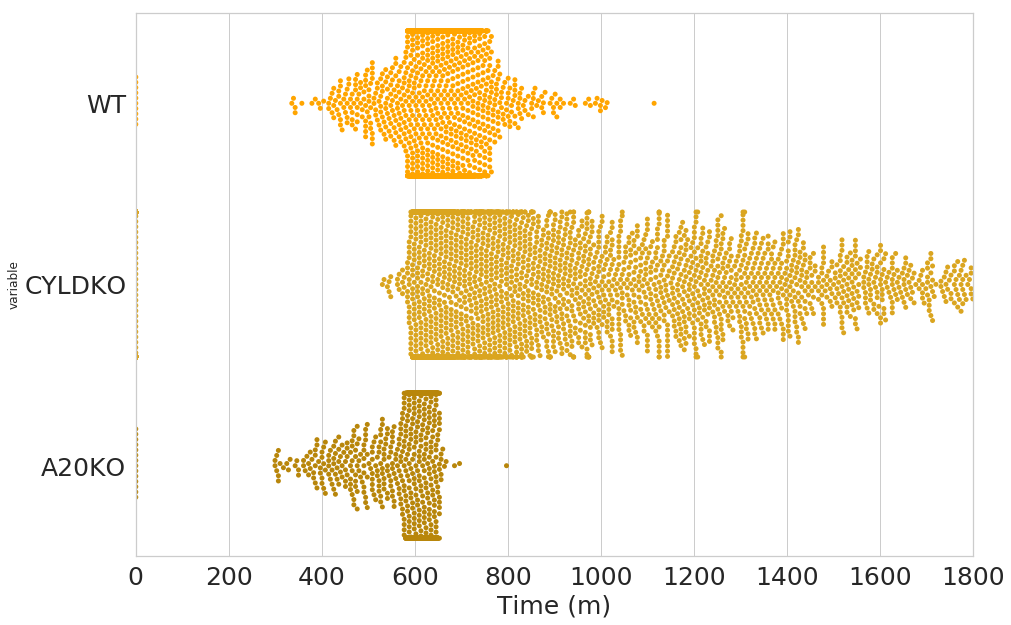

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "orange", "CYLDKO": "goldenrod", "A20KO":"darkgoldenrod"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

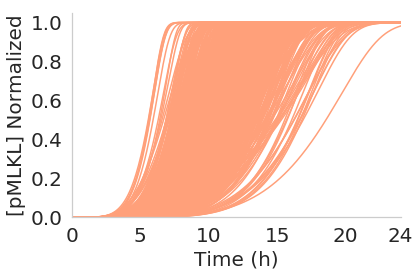

In [56]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode4_100all)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color = 'lightsalmon',
             zorder = 1)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("[pMLKL] Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
plt.savefig('pmlkl_allpars_mode2was4_tnf100_nogridlightsalmon.pdf')
plt.show() 

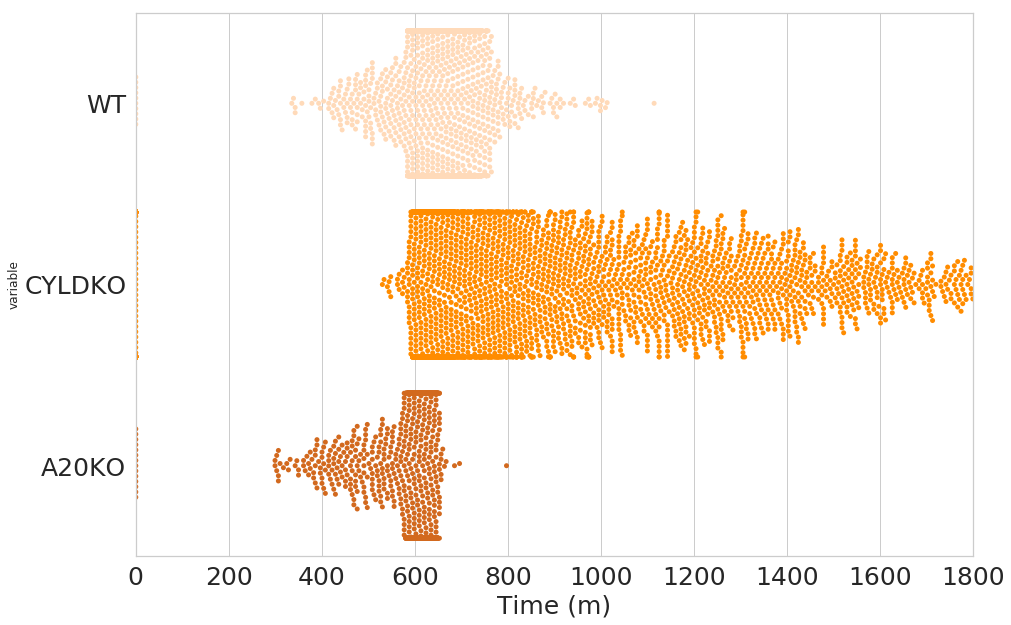

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "peachpuff", "CYLDKO": "darkorange", "A20KO":"chocolate"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode2was4_swarm_orangecolors.pdf')
plt.show()

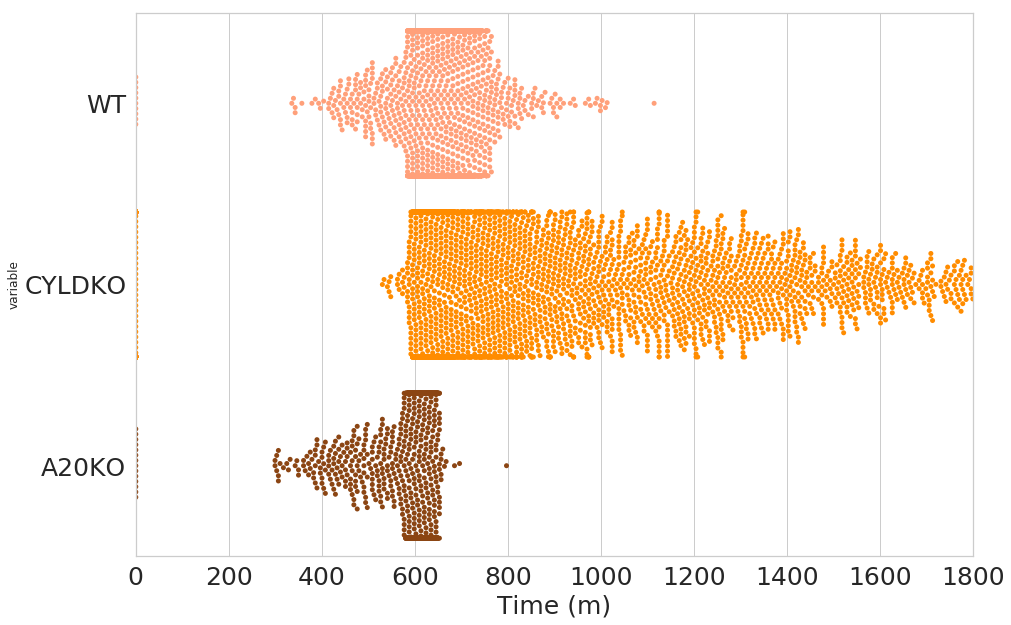

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "lightsalmon", "CYLDKO": "darkorange", "A20KO":"saddlebrown"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode2was4_swarm_orangecolors.pdf')
plt.show()